In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def f(x):
    return np.sin(x)

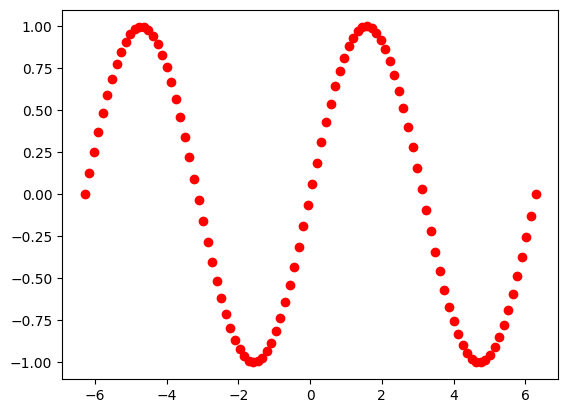

In [3]:
plt.plot(x, f(x), "ro")

In [4]:
f(x).shape

(100,)

In [5]:
upper = np.diag(np.ones_like(x)[:-1], 1)
lower = np.diag(-1 * np.ones_like(x)[:-1], -1)

h = x[1] - x[0]
diff = upper + lower
Dx = diff / 2 / h
Dx[0, 0] = -1 / h
Dx[0, 1] = 1 / h

Dx[-1, -1] = 1 / h
Dx[-1, -2] = -1 / h

In [6]:
psi = f(x)

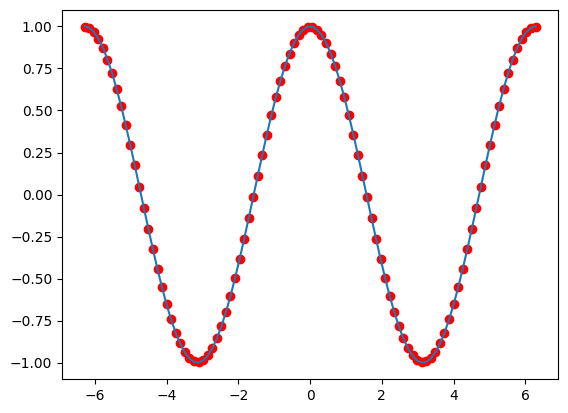

In [7]:
plt.plot(x, Dx @ psi, "ro")
plt.plot(x, np.cos(x))

In [8]:
def derive_mat(x):
    upper = np.diag(np.ones_like(x)[:-1], 1)
    lower = np.diag(-1 * np.ones_like(x)[:-1], -1)
    
    h = x[1] - x[0]
    diff = upper + lower
    Dx = diff / 2 / h
    Dx[0, 0] = -1 / h
    Dx[0, 1] = 1 / h
    
    Dx[-1, -1] = 1 / h
    Dx[-1, -2] = -1 / h
    
    return Dx

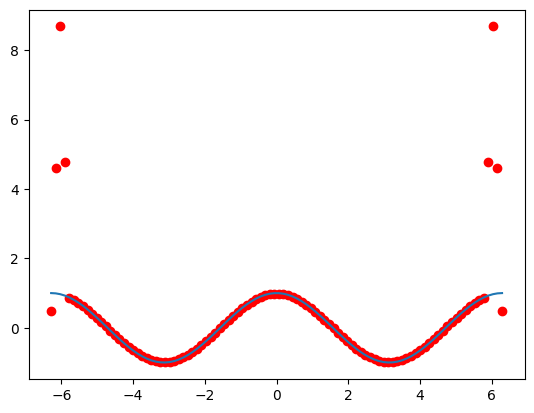

In [9]:
plt.plot(x, Dx @ Dx @ Dx @ Dx @ Dx @ psi, "ro")
plt.plot(x, np.cos(x))

In [10]:
def derive2nd_mat(x):
    upper = np.diag(np.ones_like(x)[:-1], 1)
    lower = np.diag(1 * np.ones_like(x)[:-1], -1)
    mid = np.diag(-2 * np.ones_like(x), 0)
    
    h = x[1] - x[0]
    diff = upper + lower + mid
    Dx = diff / h**2
    return Dx

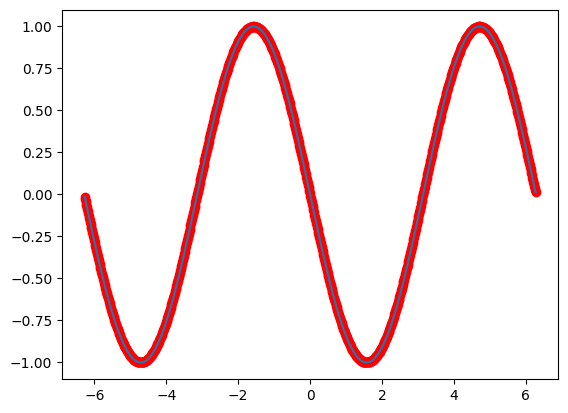

In [11]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
plt.plot(x[1:-1], (derive2nd_mat(x) @ np.sin(x))[1:-1], "ro")
plt.plot(x[1:-1], -np.sin(x)[1:-1])

In [12]:
def H_mat(x ,potential, m=1.0):
    vmatrix = np.diag(potential)
    lap = derive2nd_mat(x)
    kinetic = -lap / 2 / m
    return vmatrix + kinetic

In [13]:
k = 100
deep_well = 0.5 * k * x**2
H = H_mat(x, potential=deep_well)

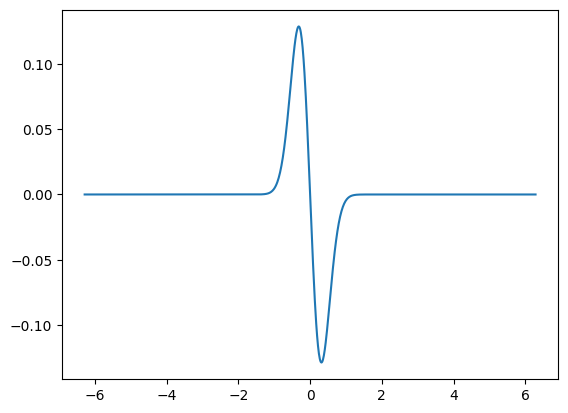

In [16]:
import scipy as sp
E, psi = sp.linalg.eigh(H)
plt.plot(x, psi[:, 1])

In [15]:
E[3]

34.98763382940101